<a href="https://colab.research.google.com/github/Szczureczek1983/Repozytorium2/blob/main/projekt_koncowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install -q kaggle

In [4]:
 from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"andrzejsz","key":"199987e5bfe79b88f6732454555a1763"}'}

In [5]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
 ! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1306         63  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03           9502        253  1.0              
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           3258        120  1.0              
sveta151/tiktok-popular-songs-2021                             Ti

In [8]:
!kaggle competitions download -c hubmap-organ-segmentation

hubmap-organ-segmentation.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# !mkdir organs

In [ ]:
# ! unzip hubmap-organ-segmentation.zip -d organs

In [11]:
# !mkdir organs/RGB_Pan

mkdir: cannot create directory ‘organs/RGB_Pan’: File exists


In [12]:

from PIL import Image
import glob

for name in glob.glob('/content/organs/train_images/*.tif'):
    im = Image.open(name)
    name = str(name).rstrip(".tif")
    im.save(name + '.jpg', 'JPEG')

for name in glob.glob('/content/organs/train_images/*.tiff'):
    im = Image.open(name)
    name = str(name).rstrip(".tiff")
    im.save(name + '.jpg', 'JPEG')

print("Conversion from tif/tiff to jpg completed!")

Conversion from tif/tiff to jpg completed!


In [13]:
import glob
import os
import shutil

src_folder = r"/content/organs/train_images/"
dst_folder = r"/content/organs/RGB_Pan/"

# Search files with .txt extension in source directory
pattern = "/*.jpg"
files = glob.glob(src_folder + pattern)

# move the files with txt extension
for file in files:
    # extract file name form file path
    file_name = os.path.basename(file)
    shutil.move(file, dst_folder + file_name)
    print('Moved:', file)

Moved: /content/organs/train_images/10610.jpg
Moved: /content/organs/train_images/27781.jpg
Moved: /content/organs/train_images/19569.jpg
Moved: /content/organs/train_images/2279.jpg
Moved: /content/organs/train_images/29213.jpg
Moved: /content/organs/train_images/12026.jpg
Moved: /content/organs/train_images/19533.jpg
Moved: /content/organs/train_images/15124.jpg
Moved: /content/organs/train_images/6021.jpg
Moved: /content/organs/train_images/18449.jpg
Moved: /content/organs/train_images/12476.jpg
Moved: /content/organs/train_images/31571.jpg
Moved: /content/organs/train_images/29296.jpg
Moved: /content/organs/train_images/30876.jpg
Moved: /content/organs/train_images/10392.jpg
Moved: /content/organs/train_images/16728.jpg
Moved: /content/organs/train_images/4066.jpg
Moved: /content/organs/train_images/4265.jpg
Moved: /content/organs/train_images/5583.jpg
Moved: /content/organs/train_images/7706.jpg
Moved: /content/organs/train_images/9777.jpg
Moved: /content/organs/train_images/1184.

In [14]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

In [16]:
raster = rio.open("/content/drive/MyDrive/5832.tiff")
print(raster.meta)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 3000, 'height': 3000, 'count': 3, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}


/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [17]:
large_arr = raster.read() # read the opened image
vmin, vmax = np.nanpercentile(large_arr, (5,95))  # 5-95% contrast stretch

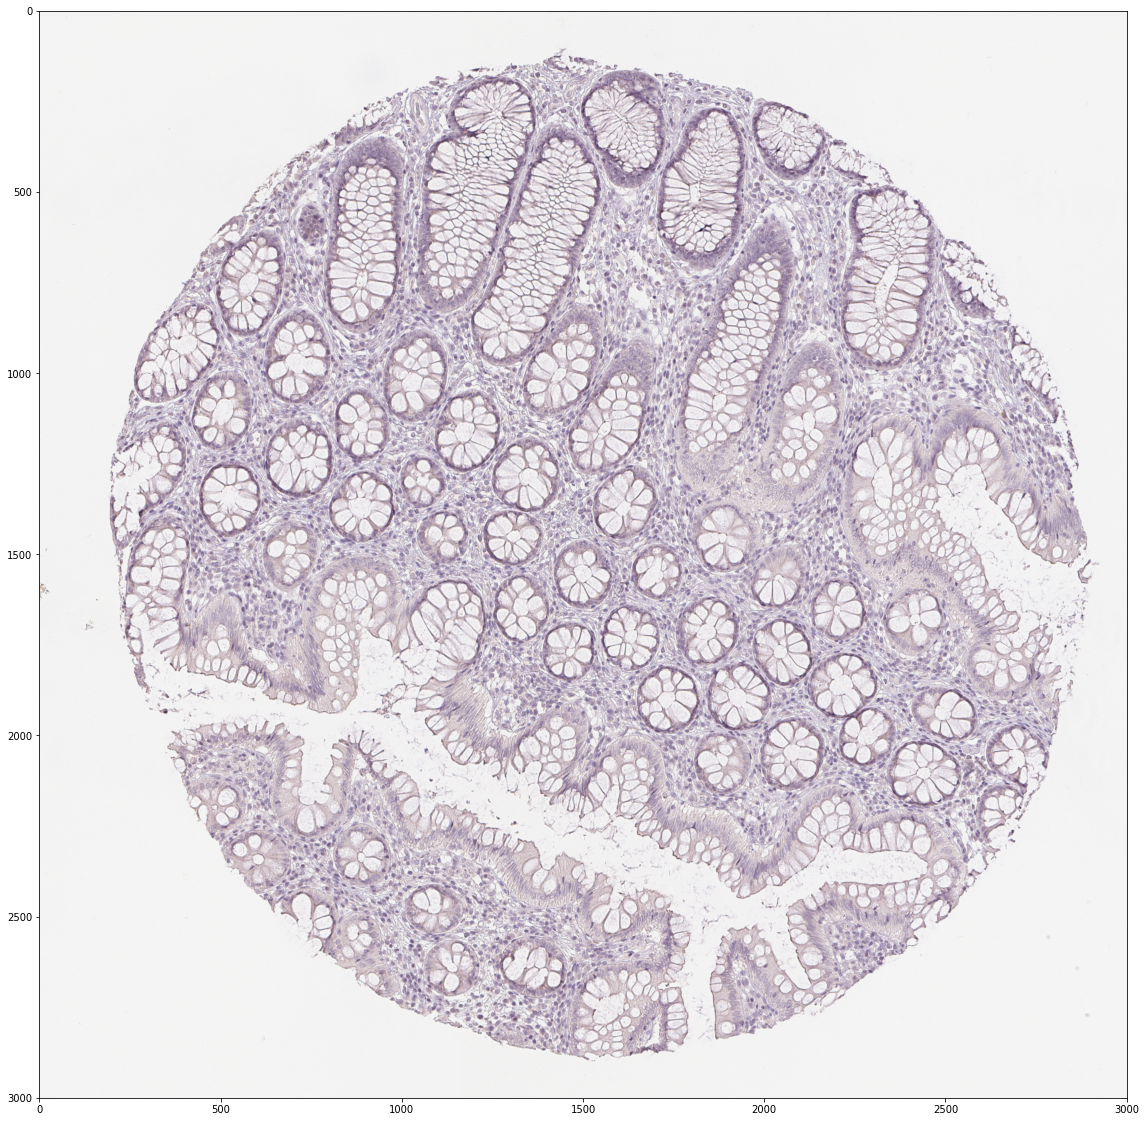

In [18]:
plt.figure(figsize=[20,20])
show(raster, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

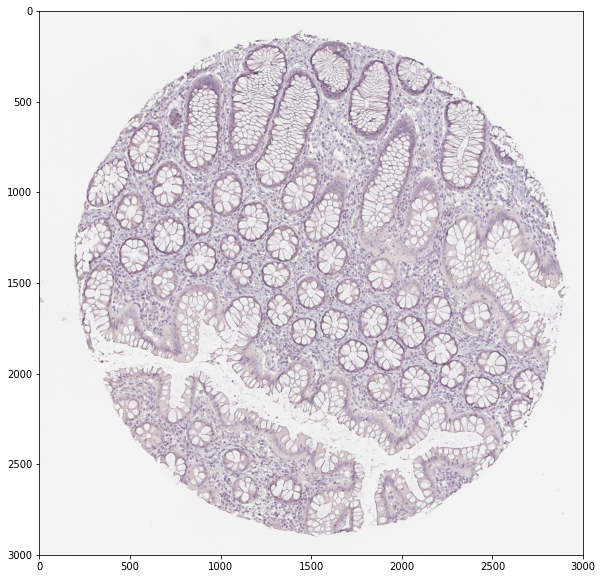

In [19]:
im_arr = raster.read() # read the opened image
vmin, vmax = np.nanpercentile(im_arr, (5,95))  # 5-95% contrast stretch# show the enhanced image
plt.figure(figsize=[10,10])
show(raster, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [20]:
imgxyb = np.empty((raster.height, raster.width, raster.count), raster.meta['dtype'])# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = raster.read(band+1)
print(imgxyb.shape)

(3000, 3000, 3)


In [21]:
import cv2
from google.colab.patches import cv2_imshow

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

scale_percent = 10 # percent of original size
width = int(imgxyb.shape[1] * scale_percent / 100)
height = int(imgxyb.shape[0] * scale_percent / 100)
dim = (width, height)
 
# resize image
resized_imgxyb = cv2.resize(imgxyb, dim, interpolation = cv2.INTER_AREA)
wrong_img_resize = cv2.resize(imgxyb, (400, 400), interpolation = cv2.INTER_AREA)
resized_imgxyb.shape

(300, 300, 3)

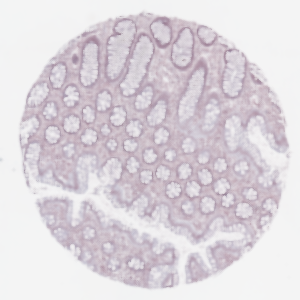

-1

In [22]:
from google.colab.patches import cv2_imshow
bilateral_filtered_image = cv2.bilateralFilter(resized_imgxyb, 5, 175, 175)
Bilateral = cv2_imshow(bilateral_filtered_image)
cv2.waitKey(0)

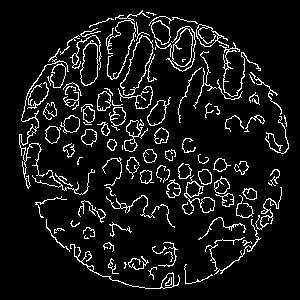

-1

In [23]:
edge_detected_image = cv2.Canny(bilateral_filtered_image, 80, 200)
Edge = cv2_imshow(edge_detected_image)
cv2.waitKey(0)

In [35]:
def get_contour(image):
  contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contour_list = []
  for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 5) & (area > 10) ):
      contour_list.append(contour)


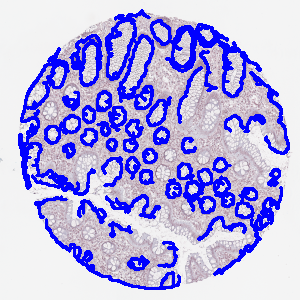

-1

In [36]:
img_c = cv2.drawContours(resized_imgxyb, contour_list,  -1, (255,0,0), 2)
circles = cv2_imshow(img_c)
cv2.waitKey(0)

In [37]:
print(hierarchy)

[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  [  4   2  -1  -1]
  [  5   3  -1  -1]
  [  6   4  -1  -1]
  [  7   5  -1  -1]
  [  8   6  -1  -1]
  [ 12   7   9  -1]
  [ 11  -1  10   8]
  [ -1  -1  -1   9]
  [ -1   9  -1   8]
  [ 13   8  -1  -1]
  [ 14  12  -1  -1]
  [ 15  13  -1  -1]
  [ 16  14  -1  -1]
  [ 17  15  -1  -1]
  [ 18  16  -1  -1]
  [ 19  17  -1  -1]
  [ 20  18  -1  -1]
  [ 21  19  -1  -1]
  [ 22  20  -1  -1]
  [ 23  21  -1  -1]
  [ 24  22  -1  -1]
  [ 25  23  -1  -1]
  [ 26  24  -1  -1]
  [ 27  25  -1  -1]
  [ 28  26  -1  -1]
  [ 29  27  -1  -1]
  [ 30  28  -1  -1]
  [ 32  29  31  -1]
  [ -1  -1  -1  30]
  [ 34  30  33  -1]
  [ -1  -1  -1  32]
  [ 36  32  35  -1]
  [ -1  -1  -1  34]
  [ 37  34  -1  -1]
  [ 38  36  -1  -1]
  [ 39  37  -1  -1]
  [ 41  38  40  -1]
  [ -1  -1  -1  39]
  [ 44  39  42  -1]
  [ 43  -1  -1  41]
  [ -1  42  -1  41]
  [ 45  41  -1  -1]
  [ 47  44  46  -1]
  [ -1  -1  -1  45]
  [ 48  45  -1  -1]
  [ 50  47  49  -1]
  [ -1  -1  -1  48]


In [38]:
filtered_contours = []
has_a_child = []

for contour, h in zip(contours, hierarchy[0]):
  if h[3] == -1:
    filtered_contours.append(contour)
    if h[2] != -1:
      has_a_child.append(1)
    else:
      has_a_child.append(0)

len(contours)


148

In [45]:
def get_fetures(contour, childs):
  features_list = []

#obliczamy momenty
  for contour, childs in zip(filtered_contours, has_a_child):
    print(contour)
    moments = cv2.moments(contour)
    hu_moments = cv2.HuMoments(moments)

#obliczmy okrągłóść
    contour_area = cv2.contourArea(contour)
    arc_length = cv2.arcLength(contour, True)
    if arc_length > 0:
      features = {x: hu[0] for x, hu in enumerate(hu_moments)}
      features['circularity'] = 4 * 3.14 * contour_area / arc_length**2   #wzór do obliczania okrągłości
      features['has_child'] = childs
      features_list.append(features)

In [68]:
import pandas as pd

pd.options.display.float_format = "{:,.3f}".format
df = pd.DataFrame(features_list)
df

0       1         2         3             4          5            6  \
0    2.878   1.730    17.676     9.811       128.670      7.147      -11.756   
1   10.647  34.336   564.996   867.725   508,295.831  2,317.891  332,829.140   
2    1.000   0.784     0.494     0.335         0.136      0.274       -0.008   
3    2.094   1.835     0.243     0.038         0.000      0.049       -0.004   
4    2.399   1.041     0.267     0.060        -0.005      0.030       -0.005   
..     ...     ...       ...       ...           ...        ...          ...   
106  0.179   0.006     0.000     0.000        -0.000     -0.000       -0.000   
107 10.970 119.248    24.656    21.444       492.988    229.813        8.762   
108 23.401 531.592 2,561.654 2,207.202 5,247,391.988 48,713.532 -100,585.815   
109  2.836   7.484     3.579     3.028         9.963      8.222        0.257   
110 11.385  71.399   145.763     8.375      -112.944    -56.690     -269.948   

     circularity  has_child  
0          0.023          0  
1          0.008          0  
2          0.194          0  
3          0.018          0  
4          0.013          0  
..           ...        ...  
106        0.730          1  
107        0.025          0  
108        0.008          0  
109        0.065          0  
110        0.002          0  

[111 rows x 9 columns]

In [47]:
from sklearn.cluster import KMeans
import numpy as np

from sklearn import preprocessing

x = df.values #returns a numpy array
normalizer = preprocessing.Normalizer()
x_scaled = normalizer.fit_transform(x)
df = pd.DataFrame(x_scaled)

kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
print(kmeans.labels_)

colors = [(255,0,0), (255,255,0), (255,0,255), (0,255,0), (0,255,255), (0,0,255)]
for contour, label in zip(filtered_contours, kmeans.labels_):
  classified = cv2.drawContours(resized_imgxyb, [contour], 0, colors[label], 3)
  
print(df)

[1 3 0 0 0 1 1 1 1 4 0 0 1 0 0 4 1 0 4 1 3 0 1 3 1 4 0 1 2 2 0 0 0 2 2 0 2
 0 2 1 3 3 0 1 2 3 1 1 1 1 2 4 0 2 0 1 2 1 0 2 2 0 2 0 1 1 2 1 2 2 0 2 1 3
 3 0 2 0 1 2 0 1 4 1 3 1 3 0 3 1 1 4 1 0 1 4 4 4 2 3 1 0 1 2 2 0 2 1 1 1 4]
        0     1     2     3      4      5      6     7     8
0   0.022 0.013 0.135 0.075  0.982  0.055 -0.090 0.000 0.000
1   0.000 0.000 0.001 0.001  0.837  0.004  0.548 0.000 0.000
2   0.690 0.541 0.341 0.231  0.094  0.189 -0.006 0.134 0.000
3   0.749 0.656 0.087 0.014  0.000  0.018 -0.001 0.006 0.000
4   0.912 0.396 0.101 0.023 -0.002  0.012 -0.002 0.005 0.000
..    ...   ...   ...   ...    ...    ...    ...   ...   ...
106 0.143 0.005 0.000 0.000 -0.000 -0.000 -0.000 0.584 0.799
107 0.020 0.214 0.044 0.038  0.884  0.412  0.016 0.000 0.000
108 0.000 0.000 0.000 0.000  1.000  0.009 -0.019 0.000 0.000
109 0.178 0.471 0.225 0.190  0.626  0.517  0.016 0.004 0.000
110 0.034 0.210 0.429 0.025 -0.332 -0.167 -0.795 0.000 0.000

[111 rows x 9 columns]


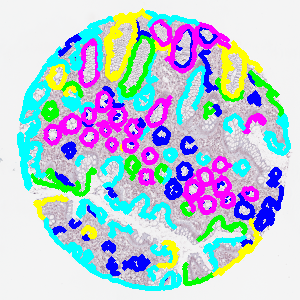

In [48]:
cv2_imshow(classified)

In [1]:
import cv2
from google.colab.patches import cv2_imshow
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
import pandas as pd
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

Working with 351 images
Image examples: 
30414.jpg


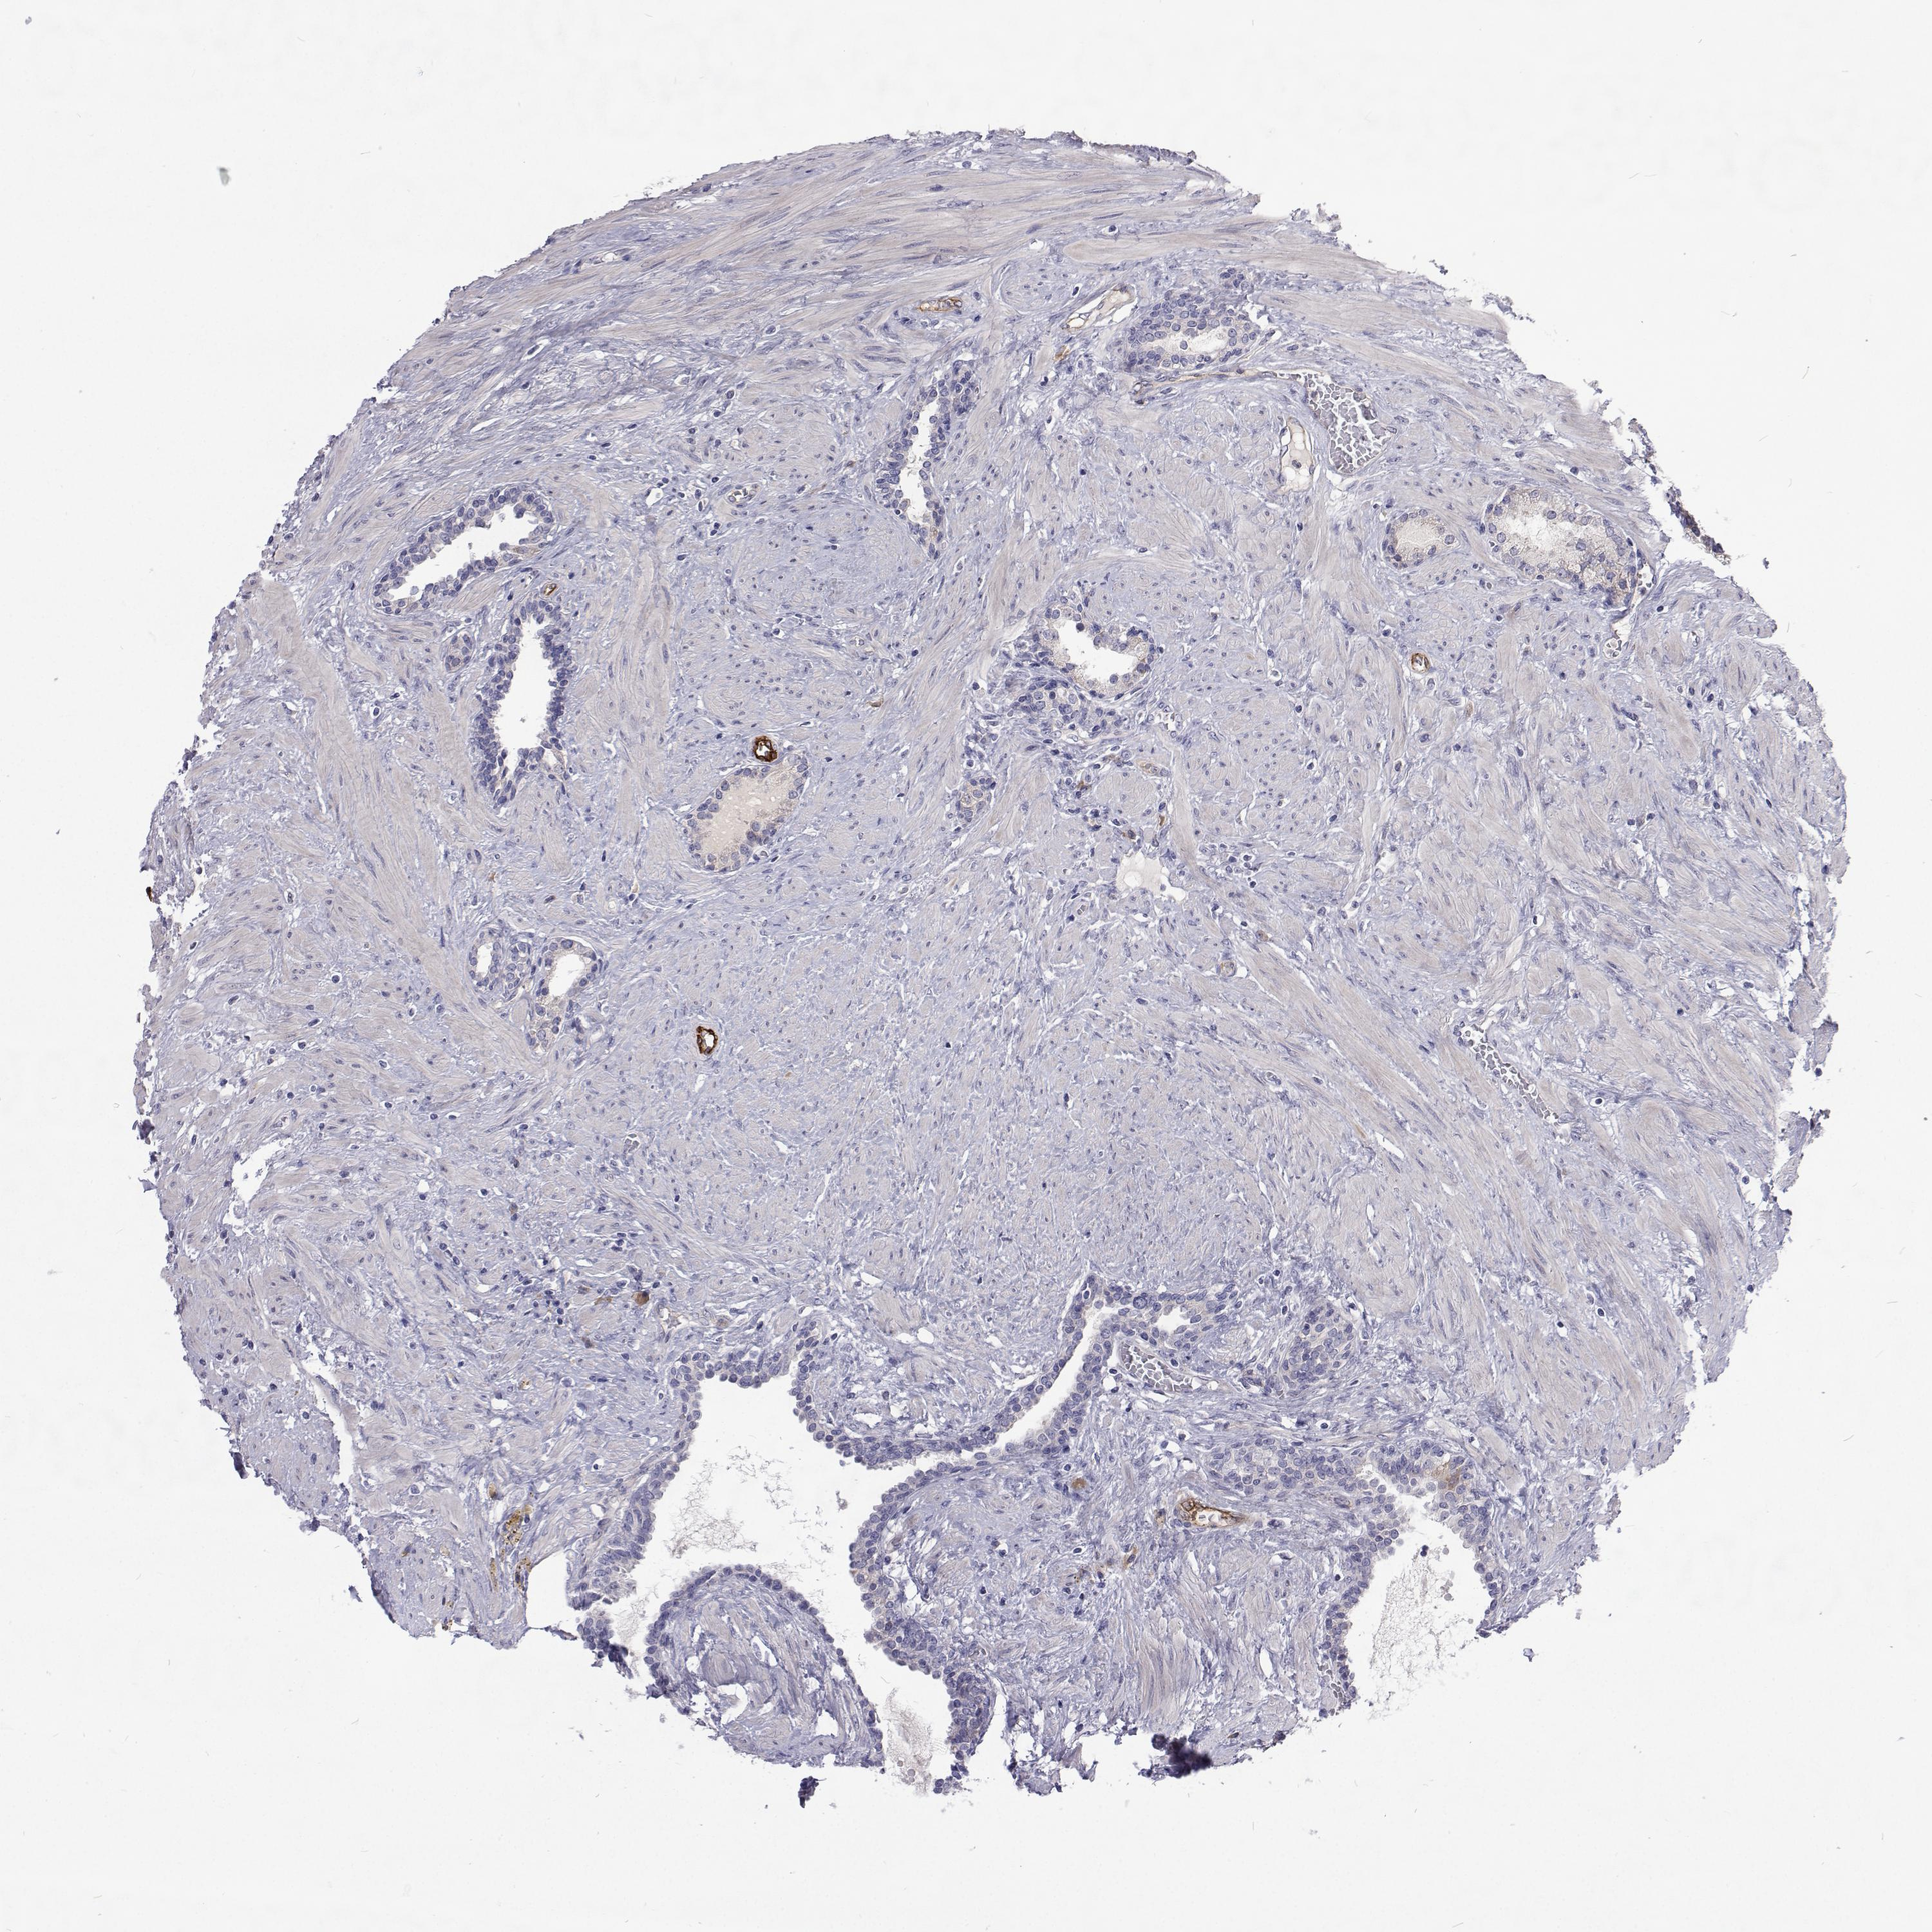

31800.jpg


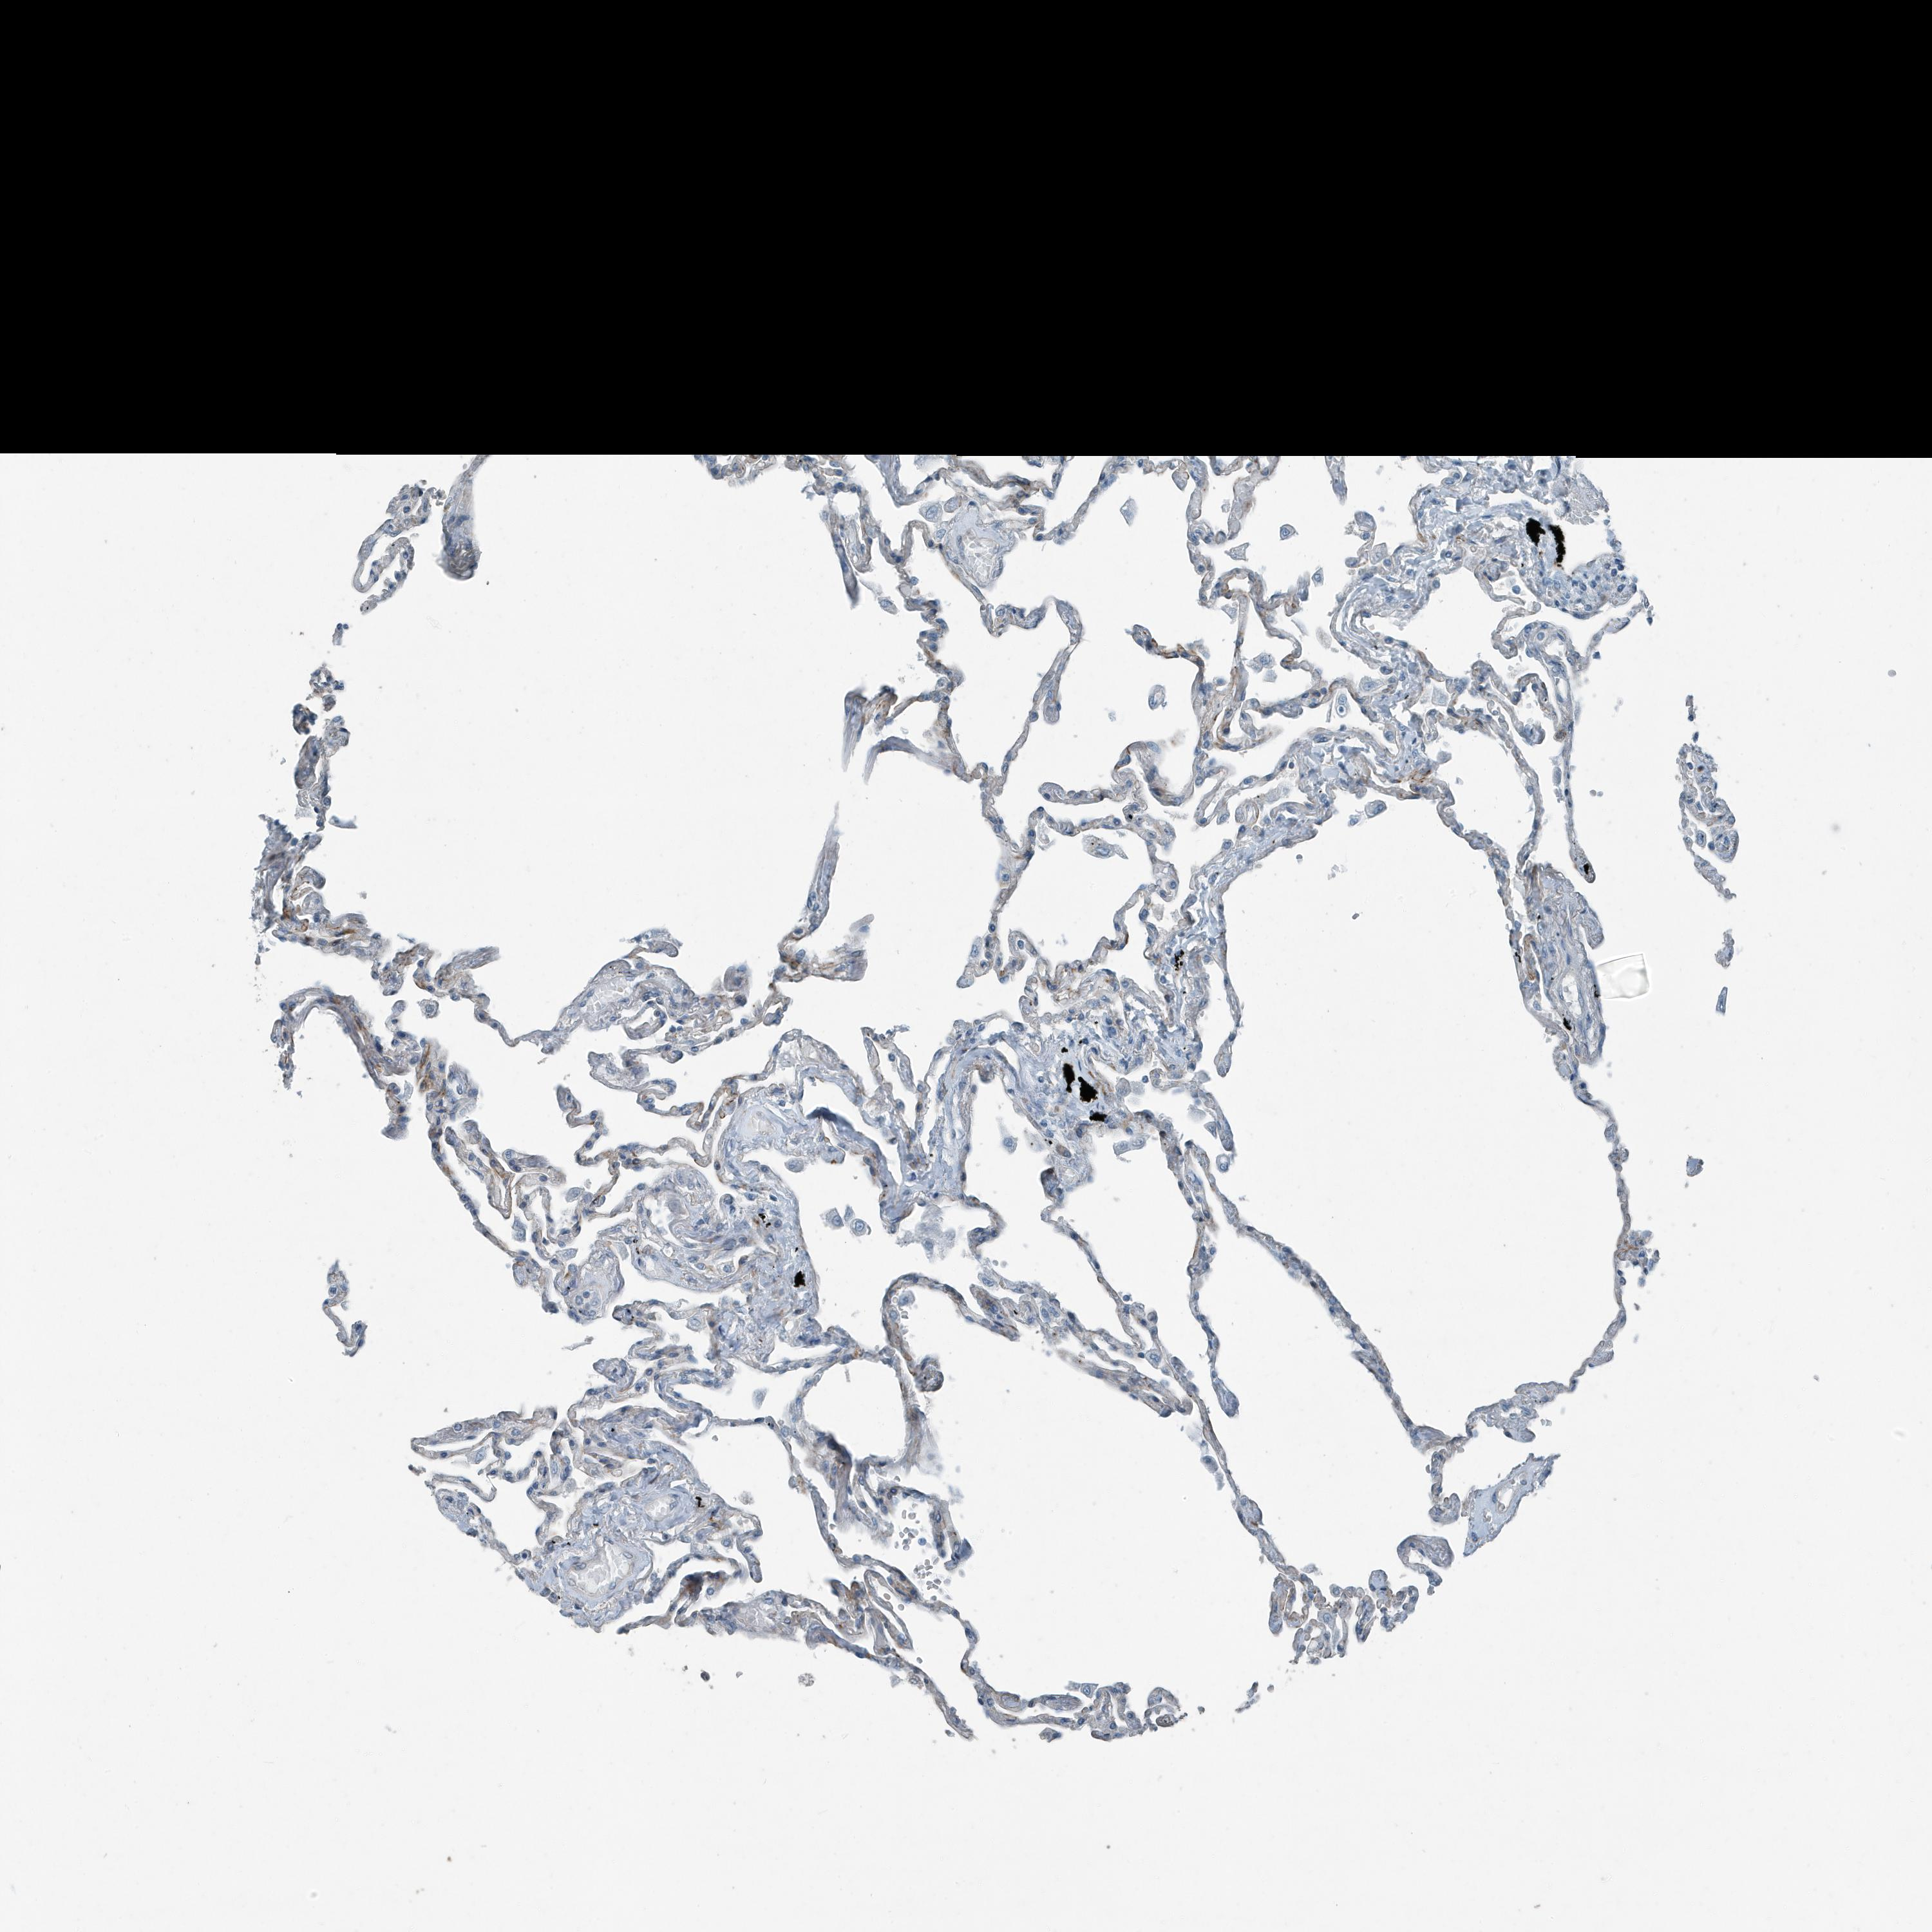

In [4]:
Dir = '/content/organs/RGB_Pan'

onlyfiles = [f for f in os.listdir(Dir) if os.path.isfile(os.path.join(Dir, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=Dir + "/" + onlyfiles[i], width=300, height=300))

In [5]:
data = pd.read_csv('/content/train_img.csv')
y=np.asarray(data['organ'])
len(y)

351

In [28]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
# y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    # label_in_file = _file.find("_")
    # y_train.append(y['organ'])
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 3000
image_height = 3000
ratio = 50

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files),image_height, image_width, channels), dtype=np.float32)



Files in train_files: 351


In [29]:
dataset.shape

(351, 60, 60, 3)

In [30]:
print(type(dataset))

<class 'numpy.ndarray'>


In [31]:
dataset.shape

(351, 60, 60, 3)

In [32]:
from sklearn.model_selection import train_test_split

#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42)
print("Train set size: {0}, Test set size: {1}".format(len(X_train), len(X_test)))

Train set size: 280, Test set size: 71


In [33]:
X_train.shape

(280, 60, 60, 3)

In [69]:
# import numpy as np
# from matplotlib import pyplot as plt
# from tensorflow.keras.utils import to_categorical
# import keras
# # train_x = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1) 
# # test_x = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2], 1)
# train_x = X_train.reshape(-1, 750*750)
# test_x = X_test.reshape(-1, 750*750)
# train_x = train_x/255 
# test_x = test_x/255
# classes = np.unique(y_train)
# classes_num = len(classes)
# # Change the labels from integer to categorical data
# train_y_one_hot = to_categorical(y_train) 
# test_y_one_hot = to_categorical(y_test)
# train_x.shape

(280, 562500)

In [70]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# model = Sequential()
# model.add(Dense(50, activation='relu', input_shape=(train_x.shape[1],)))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(classes_num, activation='softmax'))
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(train_x, train_y_one_hot,
#                    batch_size=256, epochs=10, verbose=True,
#                    validation_data=(test_x, test_y_one_hot))
# [test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
# print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

Epoch 1/10
2/2 [==============================] - 4s 749ms/step - loss: 1.6094 - accuracy: 0.2893 - val_loss: 1.6078 - val_accuracy: 0.2958
Epoch 2/10
2/2 [==============================] - 3s 671ms/step - loss: 1.6081 - accuracy: 0.2571 - val_loss: 1.6071 - val_accuracy: 0.2535
Epoch 3/10
2/2 [==============================] - 2s 421ms/step - loss: 1.6073 - accuracy: 0.2893 - val_loss: 1.6069 - val_accuracy: 0.2535
Epoch 4/10
2/2 [==============================] - 2s 461ms/step - loss: 1.6066 - accuracy: 0.2893 - val_loss: 1.6064 - val_accuracy: 0.2535
Epoch 5/10
2/2 [==============================] - 2s 424ms/step - loss: 1.6061 - accuracy: 0.2893 - val_loss: 1.6064 - val_accuracy: 0.2535
Epoch 6/10
2/2 [==============================] - 2s 438ms/step - loss: 1.6058 - accuracy: 0.2893 - val_loss: 1.6059 - val_accuracy: 0.2535
Epoch 7/10
2/2 [==============================] - 2s 429ms/step - loss: 1.6053 - accuracy: 0.2893 - val_loss: 1.6054 - val_accuracy: 0.2535
Epoch 8/10
2/2 [====

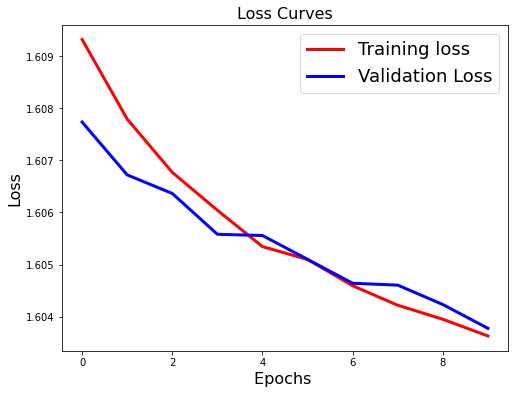

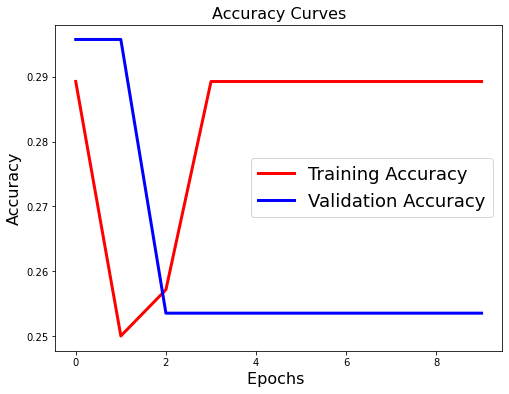

In [60]:
# def plot_history(history):
#  #Plot the Loss Curves
#  plt.figure(figsize=[8,6])
#  plt.plot(history.history['loss'],'r',linewidth=3.0)
#  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
#  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
#  plt.xlabel('Epochs ',fontsize=16)
#  plt.ylabel('Loss',fontsize=16)
#  plt.title('Loss Curves',fontsize=16)
#  #Plot the Accuracy Curves
#  plt.figure(figsize=[8,6])
#  plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
#  plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
#  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
#  plt.xlabel('Epochs ',fontsize=16)
#  plt.ylabel('Accuracy',fontsize=16)
#  plt.title('Accuracy Curves',fontsize=16)
# plot_history(history)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow


train_x = X_train/255
test_x = X_test/255
# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(y_train)
test_y_one_hot = to_categorical(y_test)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(60, 60, 3)))
model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same', strides = (2, 2)))
#model.add(MaxPooling2D((2, 2))) # Zmniejszamy rozmiar obrazów o połowę
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same', strides = (2, 2)))
#model.add(MaxPooling2D((2, 2))) # Zmniejszamy rozmiar obrazów o połowę
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same', strides = (2, 2)))
#model.add(MaxPooling2D((2, 2))) # Zmniejszamy rozmiar obrazów o połowę
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same', strides = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='softmax'))
# compile model
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# fit model
history = model.fit(train_x, train_y_one_hot, epochs=10, batch_size=64, validation_data=(test_x, test_y_one_hot), verbose=1)

Epoch 1/10
5/5 [==============================] - 5s 751ms/step - loss: nan - accuracy: 0.2893 - val_loss: nan - val_accuracy: 0.2535
Epoch 2/10
5/5 [==============================] - 4s 687ms/step - loss: nan - accuracy: 0.2893 - val_loss: nan - val_accuracy: 0.2535
Epoch 3/10
5/5 [==============================] - 4s 702ms/step - loss: nan - accuracy: 0.2893 - val_loss: nan - val_accuracy: 0.2535
Epoch 4/10
5/5 [==============================] - 4s 695ms/step - loss: nan - accuracy: 0.2893 - val_loss: nan - val_accuracy: 0.2535
Epoch 5/10
5/5 [==============================] - 4s 702ms/step - loss: nan - accuracy: 0.2893 - val_loss: nan - val_accuracy: 0.2535
Epoch 6/10
5/5 [==============================] - 4s 710ms/step - loss: nan - accuracy: 0.2893 - val_loss: nan - val_accuracy: 0.2535
Epoch 7/10
5/5 [==============================] - 4s 694ms/step - loss: nan - accuracy: 0.2893 - val_loss: nan - val_accuracy: 0.2535
Epoch 8/10
5/5 [==============================] - 4s 694ms/ste

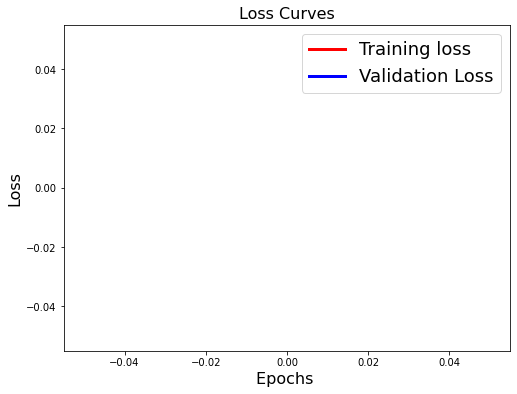

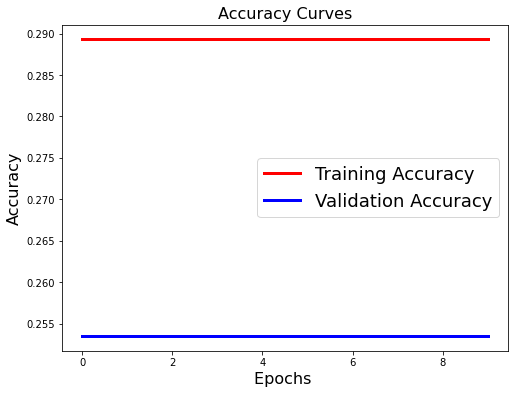

In [44]:
def plot_history(history):
 #Plot the Loss Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['loss'],'r',linewidth=3.0)
 plt.plot(history.history['val_loss'],'b',linewidth=3.0)
 plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Loss',fontsize=16)
 plt.title('Loss Curves',fontsize=16)
 #Plot the Accuracy Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
 plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
 plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Accuracy',fontsize=16)
 plt.title('Accuracy Curves',fontsize=16)
plot_history(history)

In [49]:
import tensorflow
import keras
from keras.models import Model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.utils import to_categorical
from keras.applications.mobilenet_v2 import MobileNetV2

train_x = X_train/ 255
test_x = X_test/ 255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(y_train) 
test_y_one_hot = to_categorical(y_test)
model = MobileNetV2 (input_shape= (train_x.shape [1], train_x.shape [2], 3), classes= 10, include_top=False, weights=None)
x=model.layers [-1].output
x=keras.layers.BatchNormalization (axis=-1, momentum=0.99, epsilon=0.001 )(x) 
flatten=Flatten()(x)
predictions=Dense(5, activation='softmax')(flatten)
model = Model (inputs=model.input , outputs=predictions )
# compile model
opt = tensorflow.keras.optimizers.SGD (learning_rate=0.01, momentum=0.9) 
model.compile(optimizer=opt, loss='categorical_crossentropy',
metrics=['accuracy'])
# fit model
history = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64, validation_data=(test_x, test_y_one_hot), verbose=True)
# evaluate model
_, acc = model.evaluate(test_x, test_y_one_hot, verbose=True)

Epoch 1/30
5/5 [==============================] - 10s 1s/step - loss: 1.6612 - accuracy: 0.2821 - val_loss: 1.6041 - val_accuracy: 0.2535
Epoch 2/30
5/5 [==============================] - 4s 859ms/step - loss: 8.5475 - accuracy: 0.2857 - val_loss: 7.2841 - val_accuracy: 0.1972
Epoch 3/30
5/5 [==============================] - 4s 868ms/step - loss: 30.4122 - accuracy: 0.2179 - val_loss: 119.4567 - val_accuracy: 0.2535
Epoch 4/30
5/5 [==============================] - 4s 861ms/step - loss: 47.5137 - accuracy: 0.2357 - val_loss: 125.8058 - val_accuracy: 0.1972
Epoch 5/30
5/5 [==============================] - 4s 855ms/step - loss: 51.3063 - accuracy: 0.1714 - val_loss: 283.9925 - val_accuracy: 0.2535
Epoch 6/30
5/5 [==============================] - 4s 859ms/step - loss: 40.2166 - accuracy: 0.1714 - val_loss: 205.4658 - val_accuracy: 0.2535
Epoch 7/30
5/5 [==============================] - 4s 857ms/step - loss: 21.7407 - accuracy: 0.1893 - val_loss: 164.9649 - val_accuracy: 0.2958
Epoch 8

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
import keras

# train_x = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1) 
# test_x = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2], 1)
# train_x = X_train.reshape(-1, 750*750)
# test_x = X_test.reshape(-1, 750*750)
train_x = X_train/255 
test_x = X_test/255
classes = np.unique(y_train)
classes_num = len(classes)
# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(y_train) 
test_y_one_hot = to_categorical(y_test)
train_x.shape

(280, 60, 60, 3)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow
from keras.layers import BatchNormalization, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer= 'he_uniform', padding='same', input_shape=(60, 60, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer= 'he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer= 'he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer= 'he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer= 'he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer= 'he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer= 'he_uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
# compile model
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy',
metrics=['accuracy'])
# fit model
history = model.fit(train_x, train_y_one_hot, epochs=10, batch_size=32, validation_data=(test_x, test_y_one_hot), verbose=1)
model.summary()

Epoch 1/10
9/9 [==============================] - 11s 1s/step - loss: 2.6425 - accuracy: 0.2393 - val_loss: 38138.5859 - val_accuracy: 0.2958
Epoch 2/10
9/9 [==============================] - 8s 906ms/step - loss: 3.1083 - accuracy: 0.2321 - val_loss: 8395.6650 - val_accuracy: 0.2958
Epoch 3/10
9/9 [==============================] - 8s 897ms/step - loss: 2.6882 - accuracy: 0.2143 - val_loss: 3311.2380 - val_accuracy: 0.1972
Epoch 4/10
9/9 [==============================] - 8s 905ms/step - loss: 2.0928 - accuracy: 0.2179 - val_loss: 505.6477 - val_accuracy: 0.1972
Epoch 5/10
9/9 [==============================] - 8s 907ms/step - loss: 1.8708 - accuracy: 0.2679 - val_loss: 159.3066 - val_accuracy: 0.2958
Epoch 6/10
9/9 [==============================] - 8s 901ms/step - loss: 1.8837 - accuracy: 0.2107 - val_loss: 79.5852 - val_accuracy: 0.2958
Epoch 7/10
9/9 [==============================] - 8s 900ms/step - loss: 1.7531 - accuracy: 0.2500 - val_loss: 41.0031 - val_accuracy: 0.1549
Epoch 